#<식신데이터 EDA>
KDX에서 제공받은 식신데이터를 이용해 군산에서 가장 인기있는(검색량이 높은) 맛집이 어디인지 살펴보고 그 결과를 바탕으로 folium을 이용해 지도에 표시해 한눈에 볼 수 있도록 시각화를 진행하였습니다.

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# 군산 내에서 검색량이 많은 음식점들이 주로 위치하는 지역

In [ ]:
jan = pd.read_csv('../data/jan.csv',encoding ='cp949')
feb = pd.read_csv('../data/feb.csv',encoding ='cp949')
mar = pd.read_csv('../data/mar.csv',encoding ='cp949')

result = pd.concat([jan,feb,mar], ignore_index=True)
result.head()

,LOG_DATE,INQ_CNT,LOG_CITY_NM,LOG_AREA_NM,PLC_ID,PLC_NM,ADDR,SKSN_CGR_LCLS_NM,SKSN_CGR_LCLS_CD,SKSN_CGR_SCLS_NM,SKSN_CGR_SCLS_CD
0,20210117,2,Busan,Busan,866556,힐링과메기전문점,전라북도 군산시 중정길 11,한국음식,1,한정식,101
1,20210101,2,Busan,Busan,919056,황금순대,전라북도 군산시 미제길 41,한국음식,1,한정식,101
2,20210120,2,Busan,Busan,925049,화산붕어찜,전라북도 군산시 부곡로 6,한국음식,1,한정식,101
3,20210110,2,Busan,Busan,1246071,4도C냉면&우동,전라북도 군산시 동메2길 32-4,한국음식,1,한정식,101
4,20210117,2,Busan,Busan,364335,군산향토음식관아리랑,전라북도 군산시 해망로 224,한국음식,1,한정식,101


지역별로 데이터 나누기

In [ ]:
result_gun =result[result['ADDR'].str.contains('군산')]
result_tong =result[result['ADDR'].str.contains('통영')]
result_mok =result[result['ADDR'].str.contains('목포')]

군산 데이터 전처리해주기

In [ ]:
result_gun['군산내위치'] = result_gun.ADDR.str.split(' ').str[2]
result_gun = result_gun.drop(['LOG_DATE','LOG_CITY_NM','LOG_AREA_NM','PLC_ID','SKSN_CGR_LCLS_NM','SKSN_CGR_LCLS_CD','SKSN_CGR_SCLS_CD'], axis = 1)
result_gun= result_gun.drop(['ADDR'],axis = 1)
result_gun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,INQ_CNT,PLC_NM,SKSN_CGR_SCLS_NM,군산내위치
0,2,힐링과메기전문점,한정식,중정길
1,2,황금순대,한정식,미제길
2,2,화산붕어찜,한정식,부곡로
3,2,4도C냉면&우동,한정식,동메2길
4,2,군산향토음식관아리랑,한정식,해망로
...,...,...,...,...
23600,2,지린성,중국음식,미원로
23601,2,국제반점,중국음식,구영6길
23602,2,전망좋은카페,카페/커피숍,옥도면
23603,2,4도C냉면&우동,한정식,동메2길


같은 음식점끼리 검색량 합해주기

In [ ]:
result_gun = result_gun.groupby(by =['PLC_NM','SKSN_CGR_SCLS_NM','군산내위치']).sum()
result_gun = result_gun.sort_values(by = ['INQ_CNT'],ascending=False)
result_gun

,,,INQ_CNT
PLC_NM,SKSN_CGR_SCLS_NM,군산내위치,
장미칼국수,라면/칼국수/국수/수제비,큰샘길,681
군산횟집,회,내항2길,484
복성루,중국음식,월명로,428
이성당,베이커리/제과점,중앙로,404
지린성,중국음식,미원로,365
...,...,...,...
이디야 군산수송점,카페/커피숍,수송로,1
얼큰이칼국수,떡볶이/순대/튀김/만두,평화길,1
명품소머리국밥,한정식,구영5길,1


군산에서 검색 50회 이상인 음식점만 추리기

In [ ]:
famous_군산 = result_gun[result_gun['INQ_CNT']>= 50]
famous_군산 = famous_군산.sort_values(by = ['INQ_CNT'],ascending=False)
famous_군산 = famous_군산.reset_index(['군산내위치','PLC_NM',	'SKSN_CGR_SCLS_NM'])

import re
famous_군산['군산내위치'] = famous_군산['군산내위치'].map(lambda x: re.sub(r'[0-9]+', '', x))
famous_군산 = famous_군산.groupby(['군산내위치']).sum()
famous_군산 = famous_군산.sort_values(by = ['INQ_CNT'],ascending=False)

50회이상 검색된 음식점들 중 가장많이 분포하는 지역 (총 검색량 300회이상) 살펴보기

In [ ]:
famous_군산 = famous_군산[famous_군산['INQ_CNT']>= 300]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


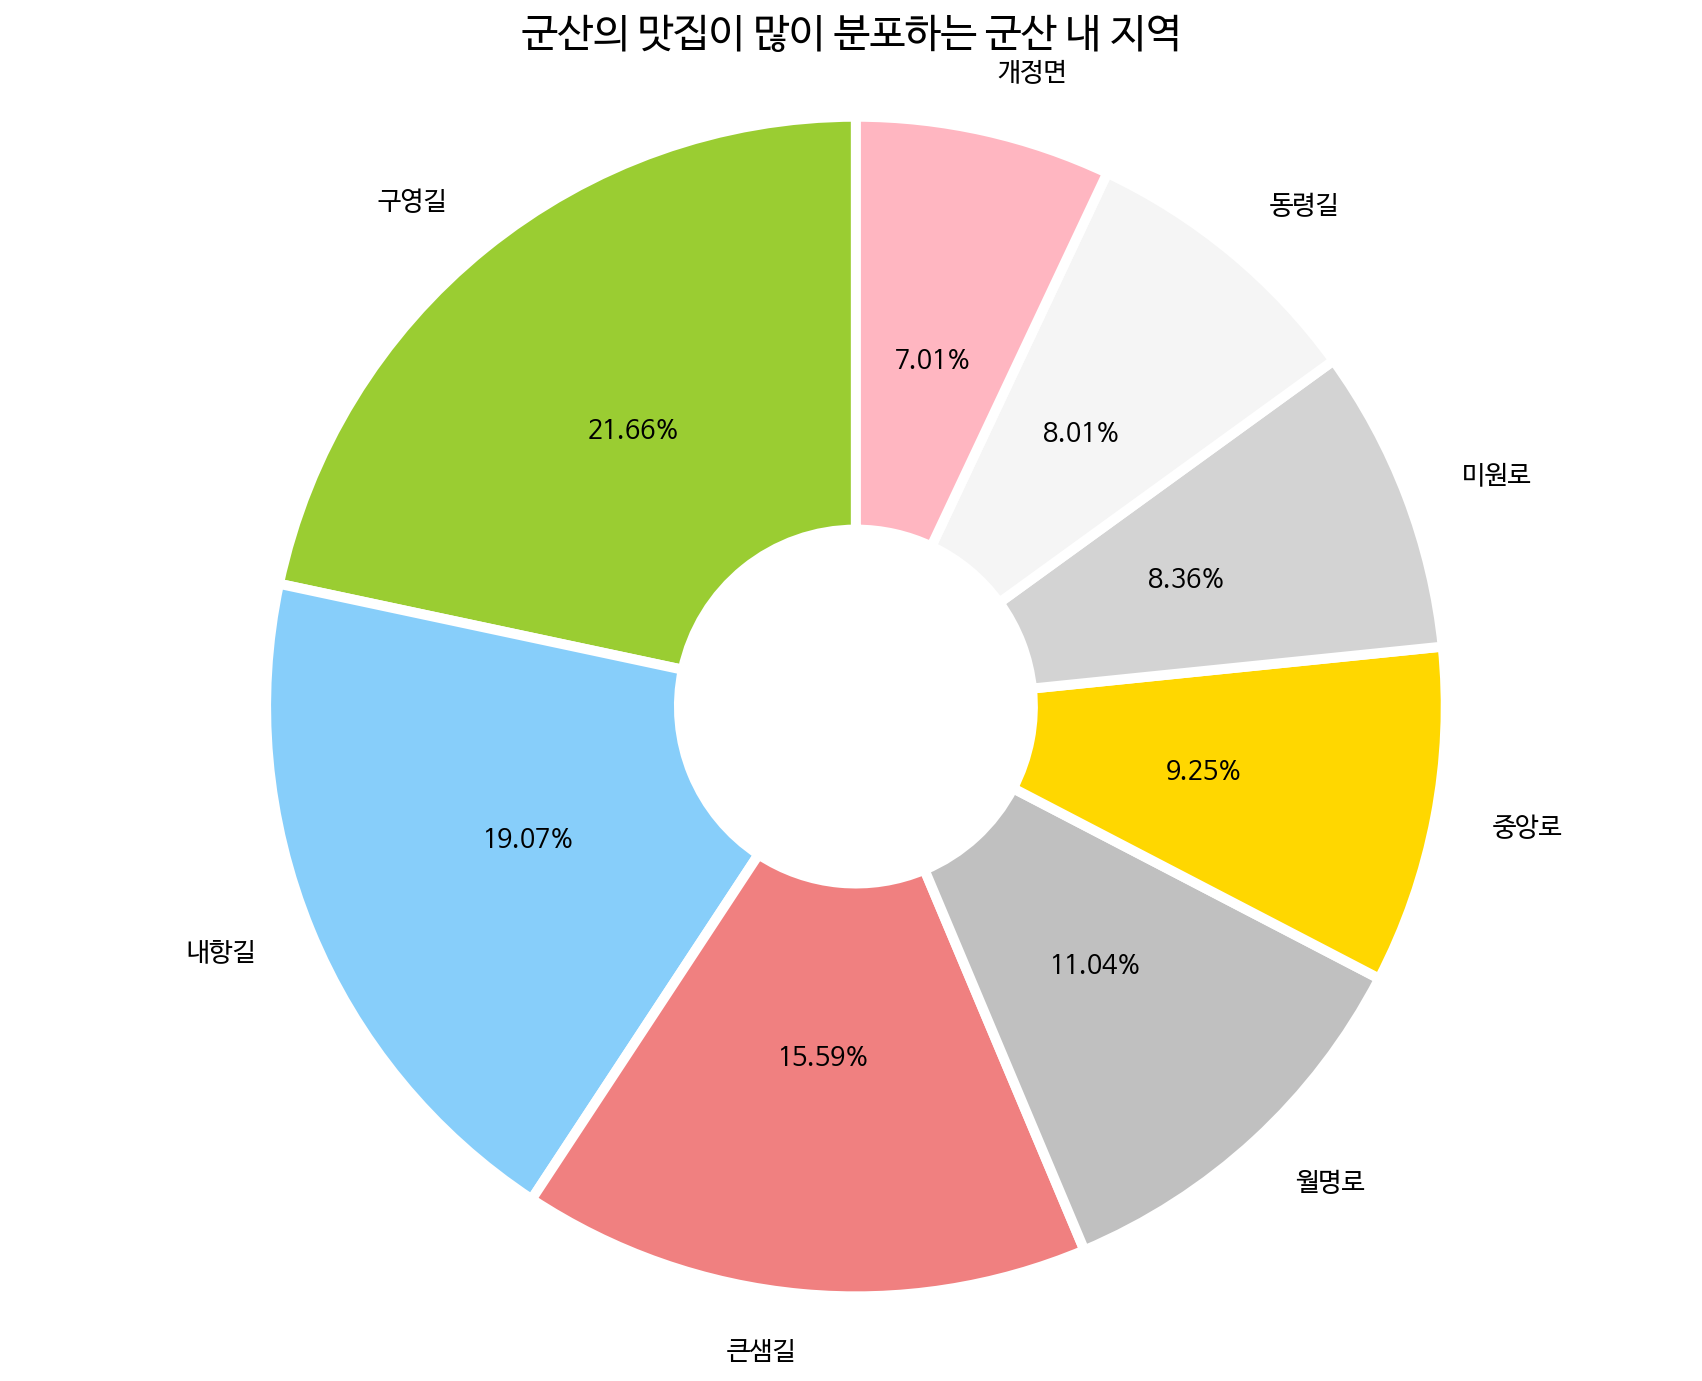

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 12]

# information of groups
group_names = famous_군산.index
group_sizes = famous_군산.values
group_colors = ['yellowgreen', 'lightskyblue', 'lightcoral','silver', 'gold', 'lightgray', 'whitesmoke','lightpink']

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
# Pie chart

plt.pie(group_sizes, 

        labels=group_names, 
        colors=group_colors, 
        autopct='%1.2f%%', # second decimal place
        startangle=90,
        textprops={'fontsize': 13},
        wedgeprops = wedgeprops) # text font size

plt.title('군산의 맛집이 많이 분포하는 군산 내 지역',fontsize= 20)
plt.axis('equal')
plt.show()


# 군산에서 가장많이 검색된 음식점들

150회 이상 검색된 음식점 추리기

In [ ]:
famous_군산 = result_gun[result_gun['INQ_CNT']>= 200]
famous_군산.sort_values(by = ['INQ_CNT'],ascending=False)
famous_군산 = famous_군산.reset_index(['PLC_NM',	'SKSN_CGR_SCLS_NM','군산내위치'])
famous_군산.drop(['군산내위치'],axis = 1,inplace=True)
famous_군산

,PLC_NM,SKSN_CGR_SCLS_NM,INQ_CNT
0,장미칼국수,라면/칼국수/국수/수제비,681
1,군산횟집,회,484
2,복성루,중국음식,428
3,이성당,베이커리/제과점,404
4,지린성,중국음식,365
5,빈해원,중국음식,350
6,쌍용반점,중국음식,349
7,새만금모싯잎송편,떡,280


In [ ]:
famous_군산.values

array([['장미칼국수', '라면/칼국수/국수/수제비', 681],
       ['군산횟집', '회', 484],
       ['복성루', '중국음식', 428],
       ['이성당', '베이커리/제과점', 404],
       ['지린성', '중국음식', 365],
       ['빈해원', '중국음식', 350],
       ['쌍용반점', '중국음식', 349],
       ['새만금모싯잎송편', '떡', 280]], dtype=object)

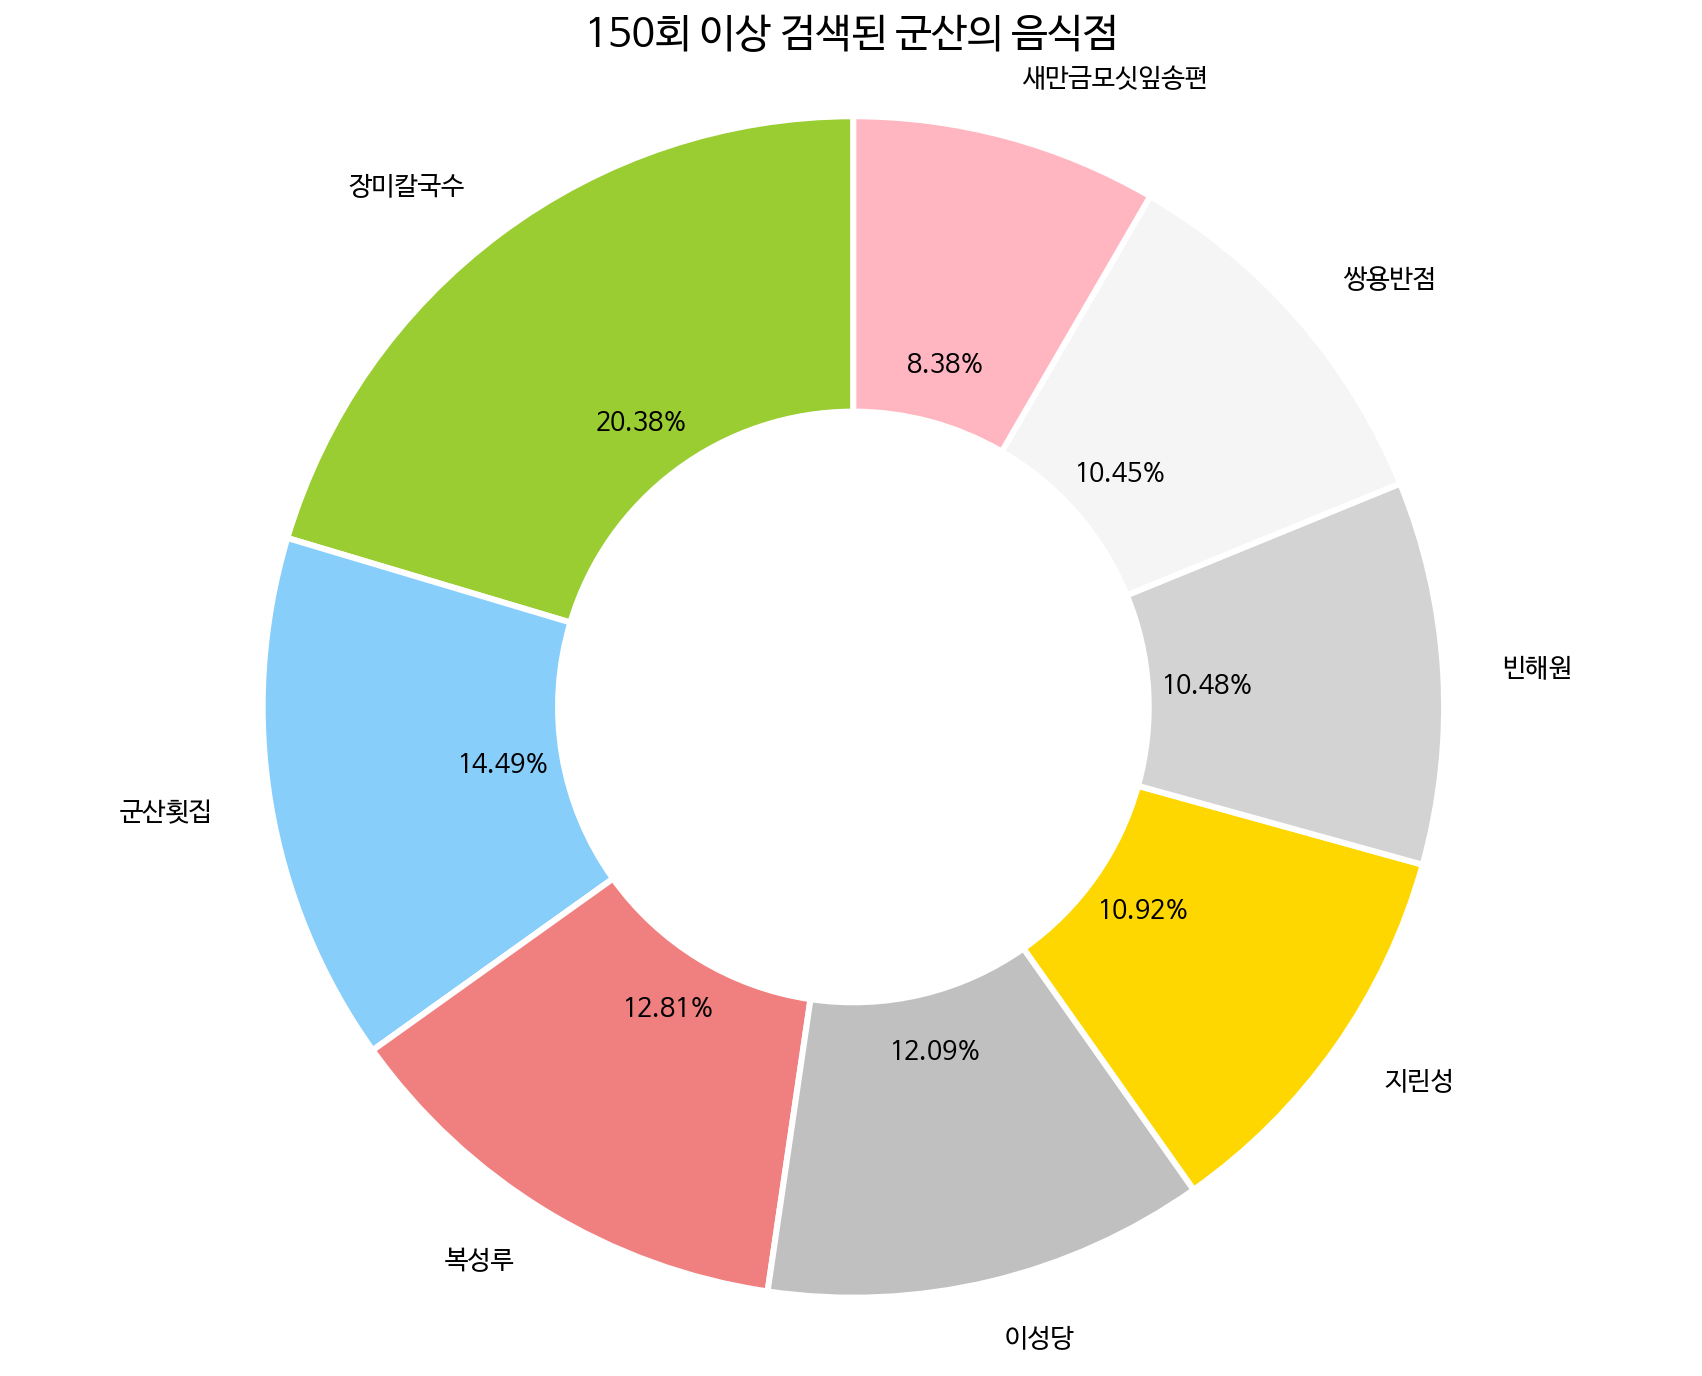

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 12]

# information of groups
group_names = famous_군산['PLC_NM']
group_sizes = famous_군산['INQ_CNT']
group_colors = ['yellowgreen', 'lightskyblue', 'lightcoral','silver', 'gold', 'lightgray', 'whitesmoke','lightpink']

wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 3}
# Pie chart

plt.pie(group_sizes, 

        labels=group_names, 
        colors=group_colors, 
        autopct='%1.2f%%', # second decimal place
        startangle=90,
        textprops={'fontsize': 13},
        wedgeprops = wedgeprops) # text font size

plt.title('150회 이상 검색된 군산의 음식점',fontsize= 20)
plt.axis('equal')
plt.show()


# 군산에서 150회 이상 검색된 음식점 지도에 나타내보기

In [ ]:
import folium

m = folium.Map(location = [36,126.7]) #경도 위도
m

In [ ]:
train = pd.read_excel('경도위도_폴리움.xlsx')
train

,가게명,경도,위도
0,장미칼국수,35.985977,126.716434
1,군산횟집,35.994519,126.707893
2,복성루,35.979101,126.715608
3,이성당,35.987748,126.710999
4,지린성,35.980393,126.713976
5,빈해원,35.989641,126.714024
6,쌍용반점,35.993801,126.710283
7,새만금모싯잎송편,35.979882,126.751211


In [ ]:
gunsan_location = train[['가게명', '위도', '경도']]

In [ ]:
map = folium.Map(location = [36,126.7], zoom_start =11
                 )


for a in gunsan_location.index:
    latitude = gunsan_location.loc[a,"경도"]
    longtitude = gunsan_location.loc[a,"위도"]
    store = gunsan_location.loc[a, "가게명"]
    folium.Marker([latitude, longtitude], popup = store, tooltip =store).add_to(map)   

map

비슷한 위치에 모두 몰려있는 것을 확인할 수 있다

In [ ]:
from folium.plugins import MarkerCluster

list1=[]
list2=[]
marker_cluster = MarkerCluster().add_to(map)
for a in gunsan_location.index:
    folium.Marker(location = [gunsan_location.loc[a,"경도"],gunsan_location.loc[a,"위도"]],
                  popup=gunsan_location.loc[a,"가게명"]).add_to(marker_cluster)
    list1.append(gunsan_location.loc[a,"경도"])
    list2.append(gunsan_location.loc[a,"위도"])
map

선유도와 함께 나타내보기

In [ ]:
latitude = 35.81123841910141
longtitude = 126.41626516260177
store = "선유도"
folium.Marker([latitude, longtitude], popup = store, tooltip =store,icon = folium.Icon(color='red')).add_to(map)   

map